[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены. !
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



# ИТОГО:
Больше всего жилья строят в Москве и области, а также СПб и Краснодаре.
Самое дорогое жилье - в Москве, СПб, на Сахалине
Дешевое - Дагестан, Чечня, Северная Осетия
Наибольшее количество жилья будет построено в Москве и области в 23-24 годах. 
План постройки на 22 год в Москве сопоставим с планом постройки в Санкт-Петербурге в 23 году.
Более многоквартирные дома строят в МСК, СПБ, Рязанской, Московской и Ленинградской областях
При этом Москва и Санкт - Петербург на первом месте - столица и город федерального назначения

Чем больше квартир, тем большая средняя площадь здания.
Больше этажей - также больше площадь. Что в целом логично.
Больше этажей - больше квартир.
Количество парковочных мест коррелирует с количеством квартир. Больше квартир - больше мест
Самые дорогие объекты за квадрат - с наименьшим количеством квартир, но при этом с большей площадью квартиры.
Количество грузовые лифтов также коррелирует с кол-вом пассажирских

Зависимость средней площади квартиры от количества квартир напоминает 1/x. Самые большие квартиры там, где их меньше всего. И наоборот.
Зависимость общей площади от средней площади квартир также обратная.

Также видно, что с высоким транспортным индексом цены на недвижимость гораздо выше.
Год окончания строительства достаточно сильно влияет на процент выкупленных квартир. Чем ближе сдача - тем больше квартир куплено.
Транспортный индекс также коррелирует со средней площадью квартир. Выше площадь - лучше расположение. 

Выше класс жилья - выше площадь квартиры
Больше всего в Москве строится жилья Бизнес-класса
В бизнес-классе и в элитном выше транспортный индекс. А вот в комфорте ниже, чем в типовом, что странно.

Данным о ценах доверять всецело нельзя!!! Есть сильные пересечения между различными классами жилья, при этом выборочная ручная проверка показывает, что цены на жилье гораздо выше, чем на сайте НАШ ДОМ РФ.

In [1]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## Список объектов

In [2]:

# offset_ = 1
# limit_ = 1000
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
# res = requests.get(url)
# objects_data = res.json()

# Данные по определенному объекту

In [3]:

# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/36774'

# Загружаем данные из pickle

In [4]:
import pandas as pd

In [5]:
#%ls ../first_task/first_task_data/Detailed_info_dom_RF.pkl

In [6]:
detailed_df = pd.read_pickle('../first_task/first_task_data/Detailed_info_dom_RF.pkl')

In [7]:
pd.set_option('display.max_columns', None) # показывать максимальное количество колонок

In [8]:
detailed_df.tail(3) #индексы соответствуют количеству объектов

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.objGuarantyEscrowFlg,developer.govFundFlg,floorMin,floorMax,miniUrl,objFloorCnt,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,developer.developerGroupName,developer.companyGroupId,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
10584,28073,96446,50,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",312,2024-06-30,Другое,Под ключ,Нет,0,14872.80,50-001972,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,06-09-2022 10:28,55.6611,37.8627,1,0,Типовой,09-09-2022 01:27,0,normal,1,19245,312,14872.8,61,0,True,0,1,1,False,1,A++,8,7344,ЯРКИЙ МИР,ЯРКИЙ МИР,ЯРКИЙ МИР,0,5,0,Московская область,+7(495)500-00-20,www.pik.ru,info@bw-estate.ru,7722442868,1187746257038,502901001,"Московская область, город Мытищи, улица Борисо...","Московская область, город Мытищи, улица Борисо...",630857.0,1,50.0,Солонец Владимир Иванович,1,Акционерное общество,АО,0,0,26.0,26.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,26.0,31-07-2024 12:00,"2,63",1.0,0.0,1.0,50.0,201.0,0.0,0.0,4.0,0.070834,85634.0,NaN,1.0,info@bw-estate.ru,ПИК,5655.0,168.0,96.0,48.0,0.0,312.0,1.0,13.0,NaN,NaN,"Жилой комплекс""Томилинский бульвар""",NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10585,44447,475093,76,"г Ярославль, Фрунзенский район, территория в р...",127,2022-12-31,Кирпич,Другое,Нет,0,6764.22,76-000546,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-09-2022 15:33,57.5679,39.865,0,0,Типовой,09-09-2022 01:27,1,normal,1,125044,127,6764.22,7,0,True,0,1,1,False,0,C,7,2538,ЯРОСЛАВЛЬЗАКАЗЧИК,ЯРОСЛАВЛЬЗАКАЗЧИК,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЯРОСЛАВЛЬЗАКАЗЧИК,0,1,3,Ярославская область,+7(485)272-94-29,yarzak.ru,yarzak@mail.ru,7604152390,1097604002803,760401001,"Ярославская область, город Ярославль, улица Ма...","Ярославская область, город Ярославль, улица Ма...",633912.0,0,76.0,Волончунас Дмитрий Викторович,1,Акционерное общество,АО,1,0,6.0,6.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,6.0,01-07-2023 12:00,"2,5",1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,0.241243,69916.0,"АО Специализированный застройщик ""Горстройзака...",0.0,yarzak@mail.ru,Ярославльзаказчик,6811.0,54.0,59.0,14.0,0.0,127.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10586,4

In [9]:
detailed_df.head(3)

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.objGuarantyEscrowFlg,developer.govFundFlg,floorMin,floorMax,miniUrl,objFloorCnt,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,developer.developerGroupName,developer.companyGroupId,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,29679,124647,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,09-09-2022 01:27,0,normal,1,40800,18,1519.0,0,0,True,0,0,0,False,0,Не нормируется,7,7424,212-2,212-2,212-2,0,1,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093.0,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,72,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:16,57.1519,65.5536,1,0,Элитный,09-09-2022 01:27,0,normal,1,39024,68,6293.78,10,0,True,0,1,1,False,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",632865.0,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,13.0,21.0,34.0,0.0,68.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,09-09-2022 01:27,0,normal,1,37201

##### Анализ пропусков

In [10]:
pd.set_option('display.max_rows', None)
pd.isnull(detailed_df).sum()

id                                               0
pdId                                             0
region                                           0
address                                         26
objElemLivingCnt                                 0
objReady100PercDt                                0
wallMaterialShortDesc                            0
objLkFinishTypeDesc                              0
objLkFreePlanDesc                               20
objElemParkingCnt                                0
objSquareLiving                                  0
rpdNum                                           0
rpdPdfLink                                       0
rpdIssueDttm                                     0
objLkLatitude                                   18
objLkLongitude                                  18
objCompensFundFlg                                0
objProblemFlg                                    0
objLkClassDesc                                   0
loadDttm                       

In [11]:
pd.set_option('display.max_rows', 20)

In [12]:
bunkrupt = detailed_df[detailed_df['developer.bankruptStage.bankruptStageCd'].isna().apply(lambda x: x^True)].copy()
bunkrupt.head(3)

# на всякий случай отложил дома, по которым застройщики банкротятся

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.objGuarantyEscrowFlg,developer.govFundFlg,floorMin,floorMax,miniUrl,objFloorCnt,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,developer.developerGroupName,developer.companyGroupId,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
29,24093,66867,57,"г Орёл, улица Панчука, д. 83",349,2022-12-31,Монолит-кирпич,Под чистовую,Нет,0,20646.86,57-000062,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,30-11-2020 11:42,52.9623,36.049,0,0,Комфорт,09-09-2022 01:27,1,normal,1,9294,349,20646.86,6,0,True,0,0,0,False,0,A+,9,556,АИЖК ОРЛОВСКОЙ ОБЛАСТИ,АИЖК ОРЛОВСКОЙ ОБЛАСТИ,АГЕНТСТВО ИПОТЕЧНОГО ЖИЛИЩНОГО КРЕДИТОВАНИЯ ОР...,0,1,0,Орловская область,+7(486)254-49-55,аижк-орел.рф,544955@ipoteka.orl.ru,5751030135,1065742000070,575101001,"Орловская область, город Орёл, площадь Мира дом 7","Орловская область, город Орел, площадь Мира 7",396081.0,0,57.0,Латышев Борис Викторович,1,Акционерное общество,АО,1,0,17.0,17.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.205653,31439.0,NaN,0.0,544955@ipoteka.orl.ru,NaN,NaN,134.0,148.0,67.0,0.0,349.0,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,Сообщение о судебном акте. О завершении конкур...,http://www.consultant.ru/document/cons_doc_LAW...,24-12-2021 09:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,35324,290662,23,"г Сочи, Краевско-Греческая, вл. Уч.1,2",114,2022-12-31,Монолит-кирпич,Без отделки,Нет,0,6343.20,23-002003,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 12:19,43.5796,39.7888,0,0,Типовой,09-09-2022 01:27,1,normal,1,115219,114,6343.2,9,0,True,0,1,0,False,0,B,3,4475,АЛЬПИК,АЛЬПИК,АЛЬПИК,0,1,0,Краснодарский край,+7 (862) 226-15-97,www.жк-ясногорский.рф/,alpik.sochi@gmail.com,7708533009,1047796587365,232001001,"Краснодарский край, г Сочи, пер Горького дом д...","Краснодарский край, г Сочи, пер Горького, д 22...",632569.0,0,23.0,Чугунников Дмитрий Анатольевич,4,Общество с ограниченной ответственностью,ООО,1,0,17.0,17.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,17.0,15-11-2022 12:00,"2,8",0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.840098,44486.0,"ООО СК ""Меридиан"" (ИНН: 7717582718)",0.0,6627182@mail.ru,NaN,NaN,93.0,15.0,6.0,0.0,114.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN

In [13]:
detailed_df.dropna(axis=1, thresh=1000, inplace=True)#дропнул колонки метро и банкротов

In [14]:
detailed_df.head(5)

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.objGuarantyEscrowFlg,developer.govFundFlg,floorMin,floorMax,miniUrl,objFloorCnt,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,developer.developerGroupName,developer.companyGroupId,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue
0,29679,124647,61,г Таганрог,18,2020-03-31,Другое,Под ключ,Есть,0,1519.00,61-000818,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20-03-2019 18:41,47.2238,38.8513,0,0,Комфорт,09-09-2022 01:27,0,normal,1,40800,18,1519.0,0,0,True,0,0,0,False,0,Не нормируется,7,7424,212-2,212-2,212-2,0,1,0,Ростовская область,+7(961)285-90-10,taganrogjsk.wixsite.com,kirpol76@gmail.com,6154572922,1116154005923,615401001,"Ростовская область, город Таганрог, улица Своб...",обл Ростовская город Таганрог улица Сергея Шил...,126093.0,0,61.0,Снимщикова Ольга Викторовна,20,Жилищный или жилищно-строительный кооператив,ЖСК,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,28105,72,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:16,57.1519,65.5536,1,0,Элитный,09-09-2022 01:27,0,normal,1,39024,68,6293.78,10,0,True,0,1,1,False,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",632865.0,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,13.0,21.0,34.0,0.0,68.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN
2,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,09-09-2022 01:27,0,normal,1,37201,65,6248.51,70,0,True,0,1,1,False,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",632865.0,1,72.0,Киселев Сергей Михайлович,1,Акционер

In [15]:
def check_na(df=detailed_df):
    pd.set_option('display.max_rows', None)
    print(pd.isnull(df).sum()[pd.isnull(df).sum() != 0])
    pd.set_option('display.max_rows', 20)

Нас интересует objPriceAvg. В данном случае средними значениями заполнять было бы не корректно. И нули также повлияют на расчеты. Поэтому дропнем все записи, для которых цена отсутствует

In [16]:
detailed_df.dropna(subset=["objPriceAvg"], inplace=True)

In [17]:
check_na()

address                                   7
developer.regRegionDesc                  86
developer.devPhoneNum                     5
developer.devEmail                        5
developer.devFactAddr                     6
developer.devOrgRegRegionCd              86
miniUrl                                   5
objTransferPlanDt                        32
objLivCeilingHeight                     712
objInfrstrPlaygrndCnt                    26
objInfrstrSportGroundCnt                 27
objInfrstrTrashAreaCnt                   26
objInfrstrObjPrkngCnt                    28
objInfrstrNotObjPrkngCnt                 35
objElevatorWheelchairCnt                 26
objElevatorPassengerCnt                  26
objElevatorCargoCnt                      26
generalContractorNm                    2252
nonlivFirstFloor                          6
objLkSaleDepEmail                       731
developer.developerGroupName           1605
developer.companyGroupId               1605
quartography.objLivElem1KCnt    

## Смотрим цены по регионам

In [18]:
regions = pd.read_html('http://www.consultant.ru/document/cons_doc_LAW_174825/12bd5d23f4e2fd372b4aff973d0c842e95bed649/')[0]
regions.rename(columns={0:'region', 1:'region_name'}, inplace=True)
regions.drop(index=0, inplace=True)
regions['region'] = regions['region'].apply(lambda x: int(x))
regions.set_index("region", inplace=True)

# Здесь сразу выгрузим датафрейм с регионами. Возьмем таблицу регионов с консультанта.

In [19]:
detailed_df = detailed_df.join(regions, on='region') # прикрутим регионы к нашему датафрейму

In [20]:
avg_price_region = detailed_df.groupby(['region', 'region_name'])['objPriceAvg'].mean()

In [21]:
avg_price_region[avg_price_region == avg_price_region.max()] #проверим регион

region  region_name
77      г. Москва      314059.988095
Name: objPriceAvg, dtype: float64

Ожидаемо, Москва

In [22]:
avg_price_region[avg_price_region == avg_price_region.min()]

region  region_name        
5       Республика Дагестан    24695.909091
Name: objPriceAvg, dtype: float64

Неожиданно, Дагестан

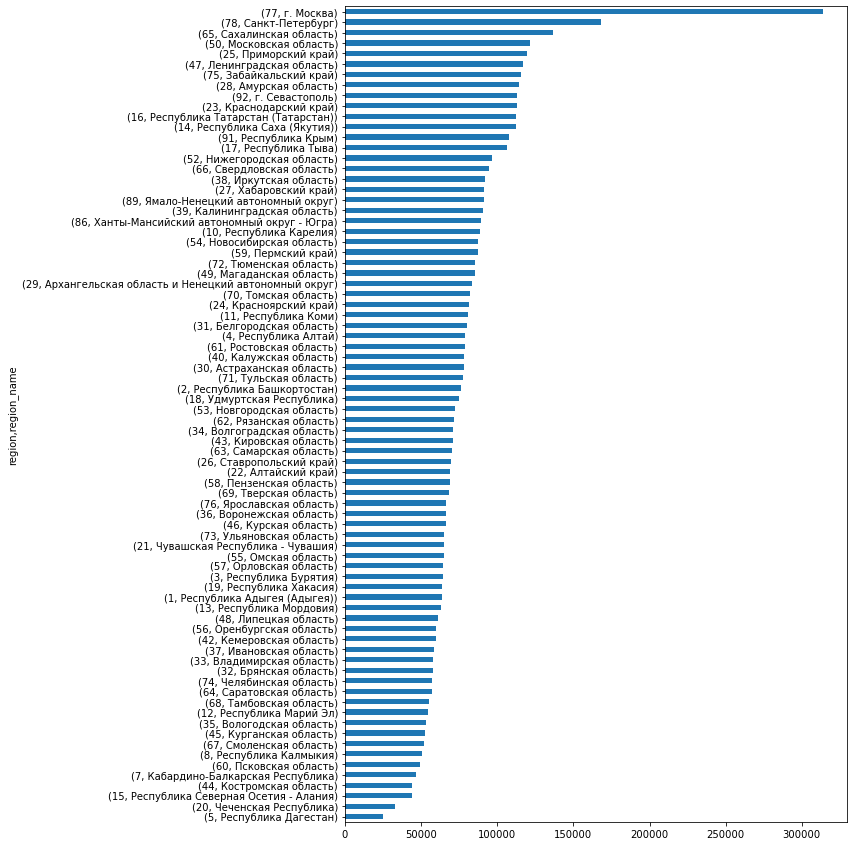

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,15
avg_price_region.sort_values().plot(kind='barh')
plt.show()
# Самое дорогое жилье - в Москве, СПб, на Сахалине
# Дешевое - Дагестан, Чечня, Северная Осетия

In [24]:
avg_price_region_class = detailed_df.groupby(['region', 'objLkClassDesc'])['objPriceAvg'].mean()

In [25]:
# sns.relplot(
#     x='region', 
#     y='objPriceAvg', 
#     hue='objLkClassDesc', 
#     data=detailed_df)
# plt.title('Диаграмма рассеяния с параметром hue', size=20, color='g');

#### Рассчитать объемы вводимого жилья по регионам и по годам.

In [26]:
detailed_df['CompliteYear'] = detailed_df["objReady100PercDt"].apply(lambda x: x[0:4]) # создали новую колонку с годом окончания стройки

In [27]:
detailed_df["objFlatSq"] = detailed_df["objFlatSq"].apply(lambda x: float(x))


In [28]:
volume_objects = detailed_df.groupby(['region_name', 'CompliteYear'])[['objFlatCnt', 'objFlatSq']].sum()
volume_objects

objFlatCnt  objFlatSq
region_name    CompliteYear                       
Алтайский край 2022                2408  118158.39
               2023                4395  228204.47
               2024                2276  114799.49
               2025                1532   71951.00
               2026                 197   15482.25
...                                 ...        ...
г. Москва      2027                1115   72073.90
г. Севастополь 2022                 364   20796.16
               2023                 238   10342.42
               2024                 403   17520.54
               2025                 877   42287.01

[338 rows x 2 columns]

In [29]:
v_sorted = volume_objects.sort_values('objFlatSq')[volume_objects['objFlatSq']!=0]

/var/folders/bh/7_my6l491f16xgnc7_s6lz3c0000gn/T/ipykernel_21225/4253545245.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  v_sorted = volume_objects.sort_values('objFlatSq')[volume_objects['objFlatSq']!=0]


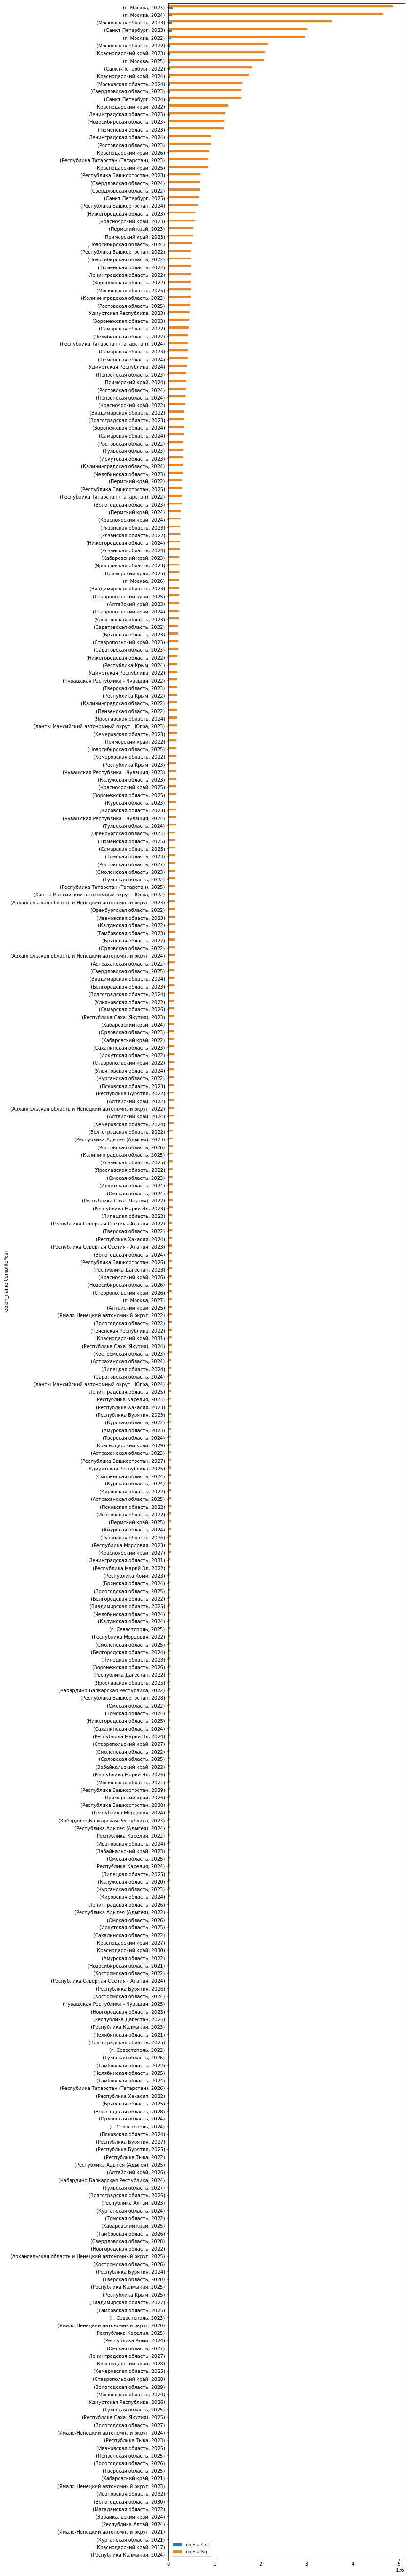

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,100
v_sorted.plot(kind='barh')
rcParams['figure.figsize'] = 9,15

#Наибольшее количество жилья будет построено в Москве и области в 23-24 годах. 
#План постройки на 22 год в Москве сопоставим с планом постройки в Санкт-Петербурге в 23 году.

In [31]:
some_analitics = detailed_df[['region', 'objFlatCnt', 'objElemParkingCnt', 'objFloorCnt', 'objSquareLiving','objPriceAvg']][(detailed_df['objFlatCnt'] != 0) & (detailed_df['objSquareLiving'] != 0)]
# Собрал аналитики по регионам, кол-ву квартир, парковочных мест, цене за квадрат и общей площади объектов
# Исключил строки, в которых кол-во квартир площадь жилья не заполнена.


In [32]:
(some_analitics['objFloorCnt'] == 0).sum() #с нулём этажей нету

0

In [33]:
some_an_means = some_analitics.groupby('region').mean() # считаем средние значения по каждому региону

In [34]:
some_an_means

,objFlatCnt,objElemParkingCnt,objFloorCnt,objSquareLiving,objPriceAvg
region,,,,,
1,121.343750,9.125000,7.125000,5464.211250,65903.375000
2,269.021739,30.168478,16.983696,12893.990054,75890.146739
3,148.375000,12.750000,14.906250,7853.949062,64056.000000
4,86.750000,7.500000,8.750000,4138.812500,78511.000000
5,193.000000,0.000000,12.909091,12639.515455,24695.909091
...,...,...,...,...,...
78,413.246193,52.804569,13.954315,17950.290685,183590.170051
86,175.350000,20.725000,11.400000,9777.606500,91526.525000
89,90.227273,0.000000,6.681818,4375.834091,91061.227273


In [35]:
some_an_means = some_an_means.join(regions)

In [36]:
some_an_means #Ура! Получилось :) Теперь есть нормальные названия регионов

,objFlatCnt,objElemParkingCnt,objFloorCnt,objSquareLiving,objPriceAvg,region_name
region,,,,,,
1,121.343750,9.125000,7.125000,5464.211250,65903.375000,Республика Адыгея (Адыгея)
2,269.021739,30.168478,16.983696,12893.990054,75890.146739,Республика Башкортостан
3,148.375000,12.750000,14.906250,7853.949062,64056.000000,Республика Бурятия
4,86.750000,7.500000,8.750000,4138.812500,78511.000000,Республика Алтай
5,193.000000,0.000000,12.909091,12639.515455,24695.909091,Республика Дагестан
...,...,...,...,...,...,...
78,413.246193,52.804569,13.954315,17950.290685,183590.170051,Санкт-Петербург
86,175.350000,20.725000,11.400000,9777.606500,91526.525000,Ханты-Мансийский автономный округ - Югра
89,90.227273,0.000000,6.681818,4375.834091,91061.227273,Ямало-Ненецкий автономный округ


In [37]:
some_an_means.sort_values('objFlatCnt', ascending=False).head(10)
# Более многоквартирные дома строят в МСК, СПБ, Рязанской, Московской и Ленинградской областях
# При этом Москва и Санкт - Петербург на первом месте - столица и город федерального назначения

,objFlatCnt,objElemParkingCnt,objFloorCnt,objSquareLiving,objPriceAvg,region_name
region,,,,,,
77,517.448980,153.801484,24.640074,27633.728256,301628.564007,г. Москва
78,413.246193,52.804569,13.954315,17950.290685,183590.170051,Санкт-Петербург
62,326.218182,23.236364,19.327273,16547.741091,71653.527273,Рязанская область
50,303.967626,17.467626,13.197842,14070.883094,122036.881295,Московская область
47,303.649351,8.597403,11.316017,12135.675541,118793.623377,Ленинградская область
23,285.249077,10.656827,15.662362,13064.001439,111619.184502,Краснодарский край
61,270.106145,21.988827,16.994413,13171.800223,81636.016760,Ростовская область
2,269.021739,30.168478,16.983696,12893.990054,75890.146739,Республика Башкортостан
66,263.987500,28.737500,20.637500,12836.041250,96254.858333,Свердловская область


In [38]:
some_an_means.sort_values('objFlatCnt').head(10)

# Наименьшее количество квартир на дом в Костромской области
# Топ-5 по наименьшему числу квартир не имеет парковок. Видимо, застройка не слишком плотная и дополнительный паркинг не требуется. 
# Посмотрим зависимость количества квартир потом на графике

,objFlatCnt,objElemParkingCnt,objFloorCnt,objSquareLiving,objPriceAvg,region_name
region,,,,,,
44,43.596154,0.000000,4.884615,2484.426538,44166.846154,Костромская область
8,58.800000,0.000000,6.700000,3515.070000,50449.600000,Республика Калмыкия
49,61.000000,0.000000,10.000000,3171.200000,85070.000000,Магаданская область
17,62.750000,0.000000,5.125000,3019.835000,106188.625000,Республика Тыва
12,85.575000,0.000000,10.975000,5174.972750,54536.625000,Республика Марий Эл
4,86.750000,7.500000,8.750000,4138.812500,78511.000000,Республика Алтай
67,88.089286,5.517857,9.875000,4979.329286,51736.517857,Смоленская область
89,90.227273,0.000000,6.681818,4375.834091,91061.227273,Ямало-Ненецкий автономный округ
38,90.423729,3.127119,10.593220,4730.779153,94096.652542,Иркутская область


In [39]:
some_an_means.sort_values('objFloorCnt').head(10)

#пока можно предположить, что количество этажей некоторым образом коррелирует с колличеством квратир

,objFlatCnt,objElemParkingCnt,objFloorCnt,objSquareLiving,objPriceAvg,region_name
region,,,,,,
44,43.596154,0.000000,4.884615,2484.426538,44166.846154,Костромская область
17,62.750000,0.000000,5.125000,3019.835000,106188.625000,Республика Тыва
89,90.227273,0.000000,6.681818,4375.834091,91061.227273,Ямало-Ненецкий автономный округ
8,58.800000,0.000000,6.700000,3515.070000,50449.600000,Республика Калмыкия
1,121.343750,9.125000,7.125000,5464.211250,65903.375000,Республика Адыгея (Адыгея)
31,94.000000,0.090909,7.750000,4905.610682,80192.363636,Белгородская область
15,93.096774,14.354839,7.806452,6156.652258,46146.258065,Республика Северная Осетия - Алания
65,104.424242,11.939394,8.303030,5648.869394,137773.000000,Сахалинская область
39,132.836735,14.183673,8.510204,7305.796871,87385.292517,Калининградская область


### Попробуем построить графики

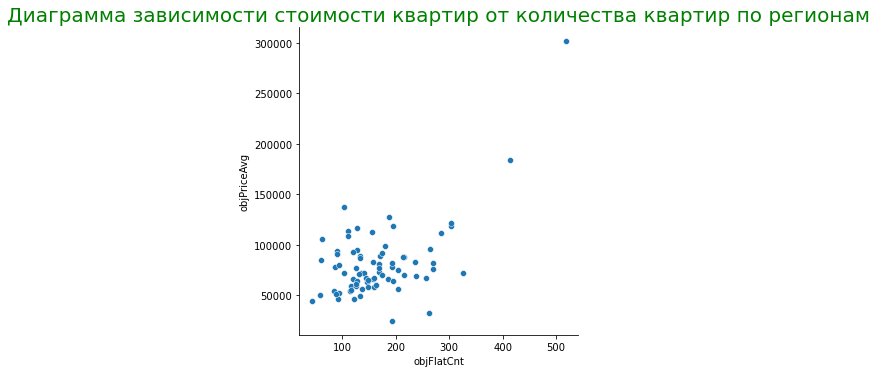

In [40]:
sns.relplot(
    x='objFlatCnt',
    y='objPriceAvg',
    #hue='Promotion',
    #style='weekend',
    #size='Cookies',
    #markers=['^', 'D'],
    data=some_an_means
)

plt.title('Диаграмма зависимости стоимости квартир от количества квартир по регионам', size=20, color='g');

# Прослеживается некоторая зависимость, но не слишком явная, больше видна на регионах с наибольшим кол-вом квартир на объекте 
# В регионах с самой большой стоимостью квартир строят наибольшее количество квартир на дом.

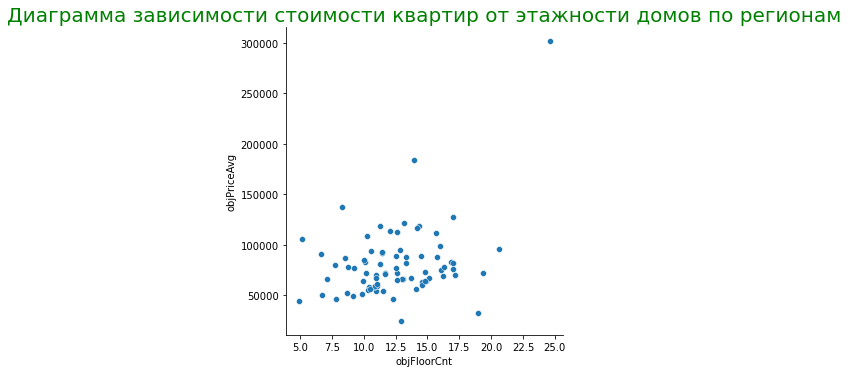

In [41]:
sns.relplot(
    x='objFloorCnt',
    y='objPriceAvg',
    #hue='Promotion',
    #style='weekend',
    #size='Cookies',
    #markers=['^', 'D'],
    data=some_an_means
)

plt.title('Диаграмма зависимости стоимости квартир от этажности домов по регионам', size=20, color='g');
# Опять же, явной зависимости не наблюдается, выделяется только Москва.
# Сделаю исследование по объектам Москвы, как самого дорогого региона

Text(-15.450000000000003, 0.5, 'Средняя стоимость m^2')

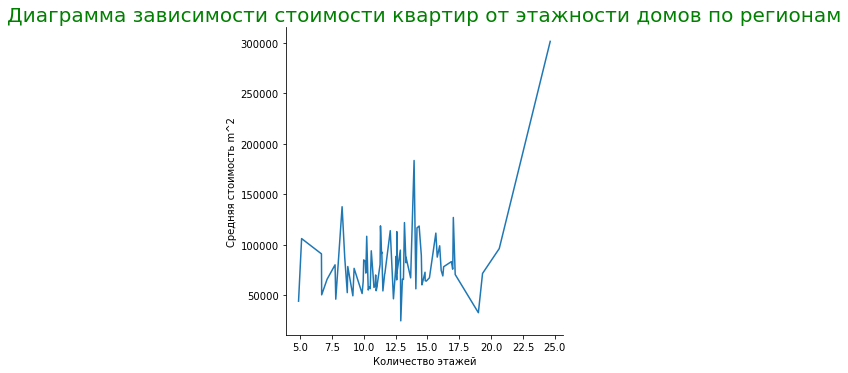

In [42]:
sns.relplot(
    x='objFloorCnt',
    y='objPriceAvg',
    #hue='Promotion',
    #style='weekend',
    #size='Cookies',
    #markers=['^', 'D'],
    data=some_an_means, 
    kind='line')

plt.title('Диаграмма зависимости стоимости квартир от этажности домов по регионам', size=20, color='g')
plt.xlabel('Количество этажей')
plt.ylabel('Средняя стоимость m^2')


#Зависимости также почти не наблюдается, кроме Москвы. Необходимо исследовать в отдельности по каждому региону.

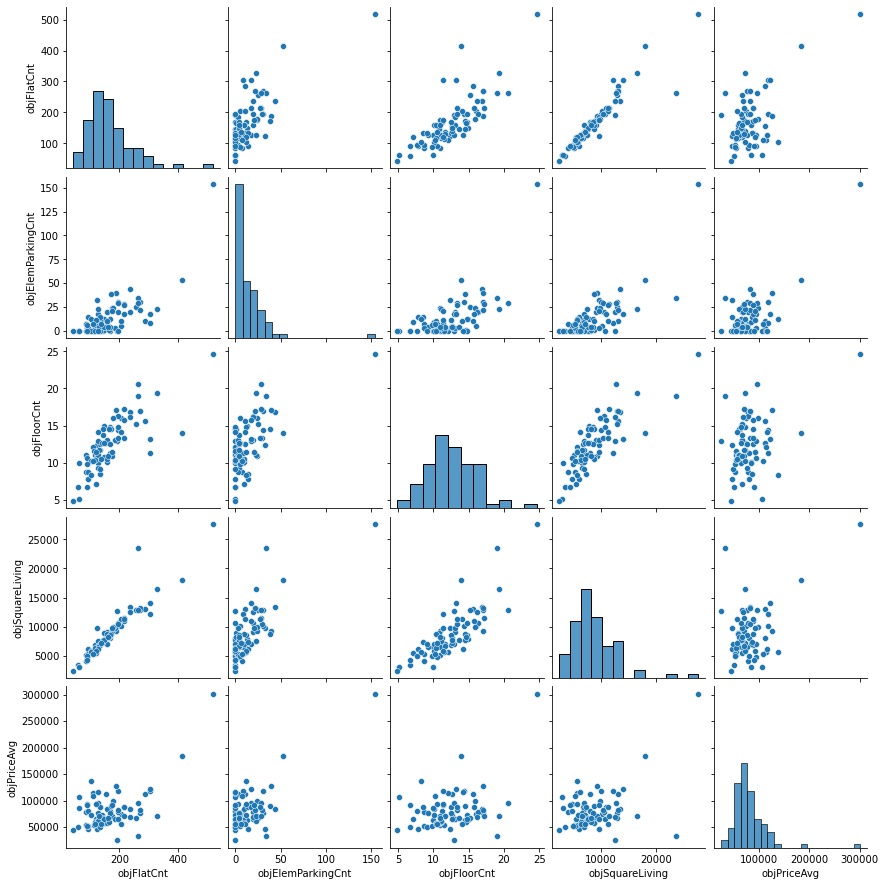

In [43]:
sns.pairplot(some_an_means) #Попробуем сразу вывести все возможные зависимости

In [44]:
#Сразу видим, что, чем больше квартир, тем большая средняя площадь здания.
#Больше этажей - также больше площадь. Что в целом логично.
#Больше этажей - больше квартир.
# Стоимость придется исследовать по регионам отдельно.
# Также прослеживается связь парковочных мест с этажностью зданий. Больше этажей - больше парковок.

#### Далее вернемся к предыдущема датафрейму и исследуем данные в пределах Москвы

In [45]:
detailed_df.head(3)

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.objGuarantyEscrowFlg,developer.govFundFlg,floorMin,floorMax,miniUrl,objFloorCnt,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,developer.developerGroupName,developer.companyGroupId,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,region_name,CompliteYear
1,13383,28105,72,г Тюмень,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6293.78,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:16,57.1519,65.5536,1,0,Элитный,09-09-2022 01:27,0,normal,1,39024,68,6293.78,10,0,True,0,1,1,False,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",632865.0,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,4.0,20.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,20.0,28-02-2023 12:00,"2,8",1.0,1.0,1.0,0.0,11.0,0.0,5.0,1.0,0.407164,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,info@2mengroup.ru,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,13.0,21.0,34.0,0.0,68.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,Тюменская область,2022
2,13397,28141,72,"г Тюмень, ул Профсоюзная, д. 56",65,2024-12-31,Другое,Без отделки,Нет,0,6248.51,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,09-09-2022 01:27,0,normal,1,37201,65,6248.51,70,0,True,0,1,1,False,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",632865.0,1,72.0,Киселев Сергей Михайлович,1,Акционерное общество,АО,0,0,6.0,12.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,12.0,28-02-2025 12:00,"2,96",1.0,1.0,1.0,11.0,10.0,0.0,5.0,4.0,0.999984,45523.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,info@2mengroup.ru,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,5776.0,0.0,24.0,35.0,6.0,65.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,Тюменская область,2024
3,13398,28141,72,"г Тюмень, ул Профсоюзная, д. 56",43,2024-12-31,Другое,Без отделки,Нет,0,4812.98,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,07-09-2022 15:20,57.1519,65.5544,0,0,Элитный,09-09-2022 01:27,0,normal,1,37165,43,4812.98,48,0,True,0,1,1,False,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengro

In [46]:
detailed_df['mean_square'] = detailed_df['objSquareLiving']/detailed_df['objElemLivingCnt']


In [47]:
detailed_df['transportDistIndex'] = detailed_df[detailed_df['transportDistIndex'].isna() ^ True]['transportDistIndex'].apply(lambda some_x: int(some_x.split(sep=' / ')[0])/int(some_x.split(sep=' / ')[1]))

In [48]:
detailed_df[detailed_df['transportDistIndex'].isna() ^ True]['transportDistIndex']

7        0.1
9        0.2
17       0.5
28       0.6
39       0.4
        ... 
10502    1.0
10523    0.9
10554    0.4
10555    0.7
10556    1.0
Name: transportDistIndex, Length: 1717, dtype: float64

In [49]:
Moscow_data = detailed_df[['objFlatCnt', 'objElemParkingCnt', 
             'objFloorCnt', 'objSquareLiving','objLkClassDesc', 'transportDistIndex',
             'objPriceAvg', 'CompliteYear', 'objElevatorCargoCnt', 'objElevatorPassengerCnt', 
                           'mean_square', 'soldOutPerc']][(detailed_df['objFlatCnt'] != 0) & 
                                                          (detailed_df['objSquareLiving'] != 0) & 
                                                          (detailed_df['region'] == 77)]
Moscow_data['CompliteYear'] = Moscow_data['CompliteYear'].apply(int)

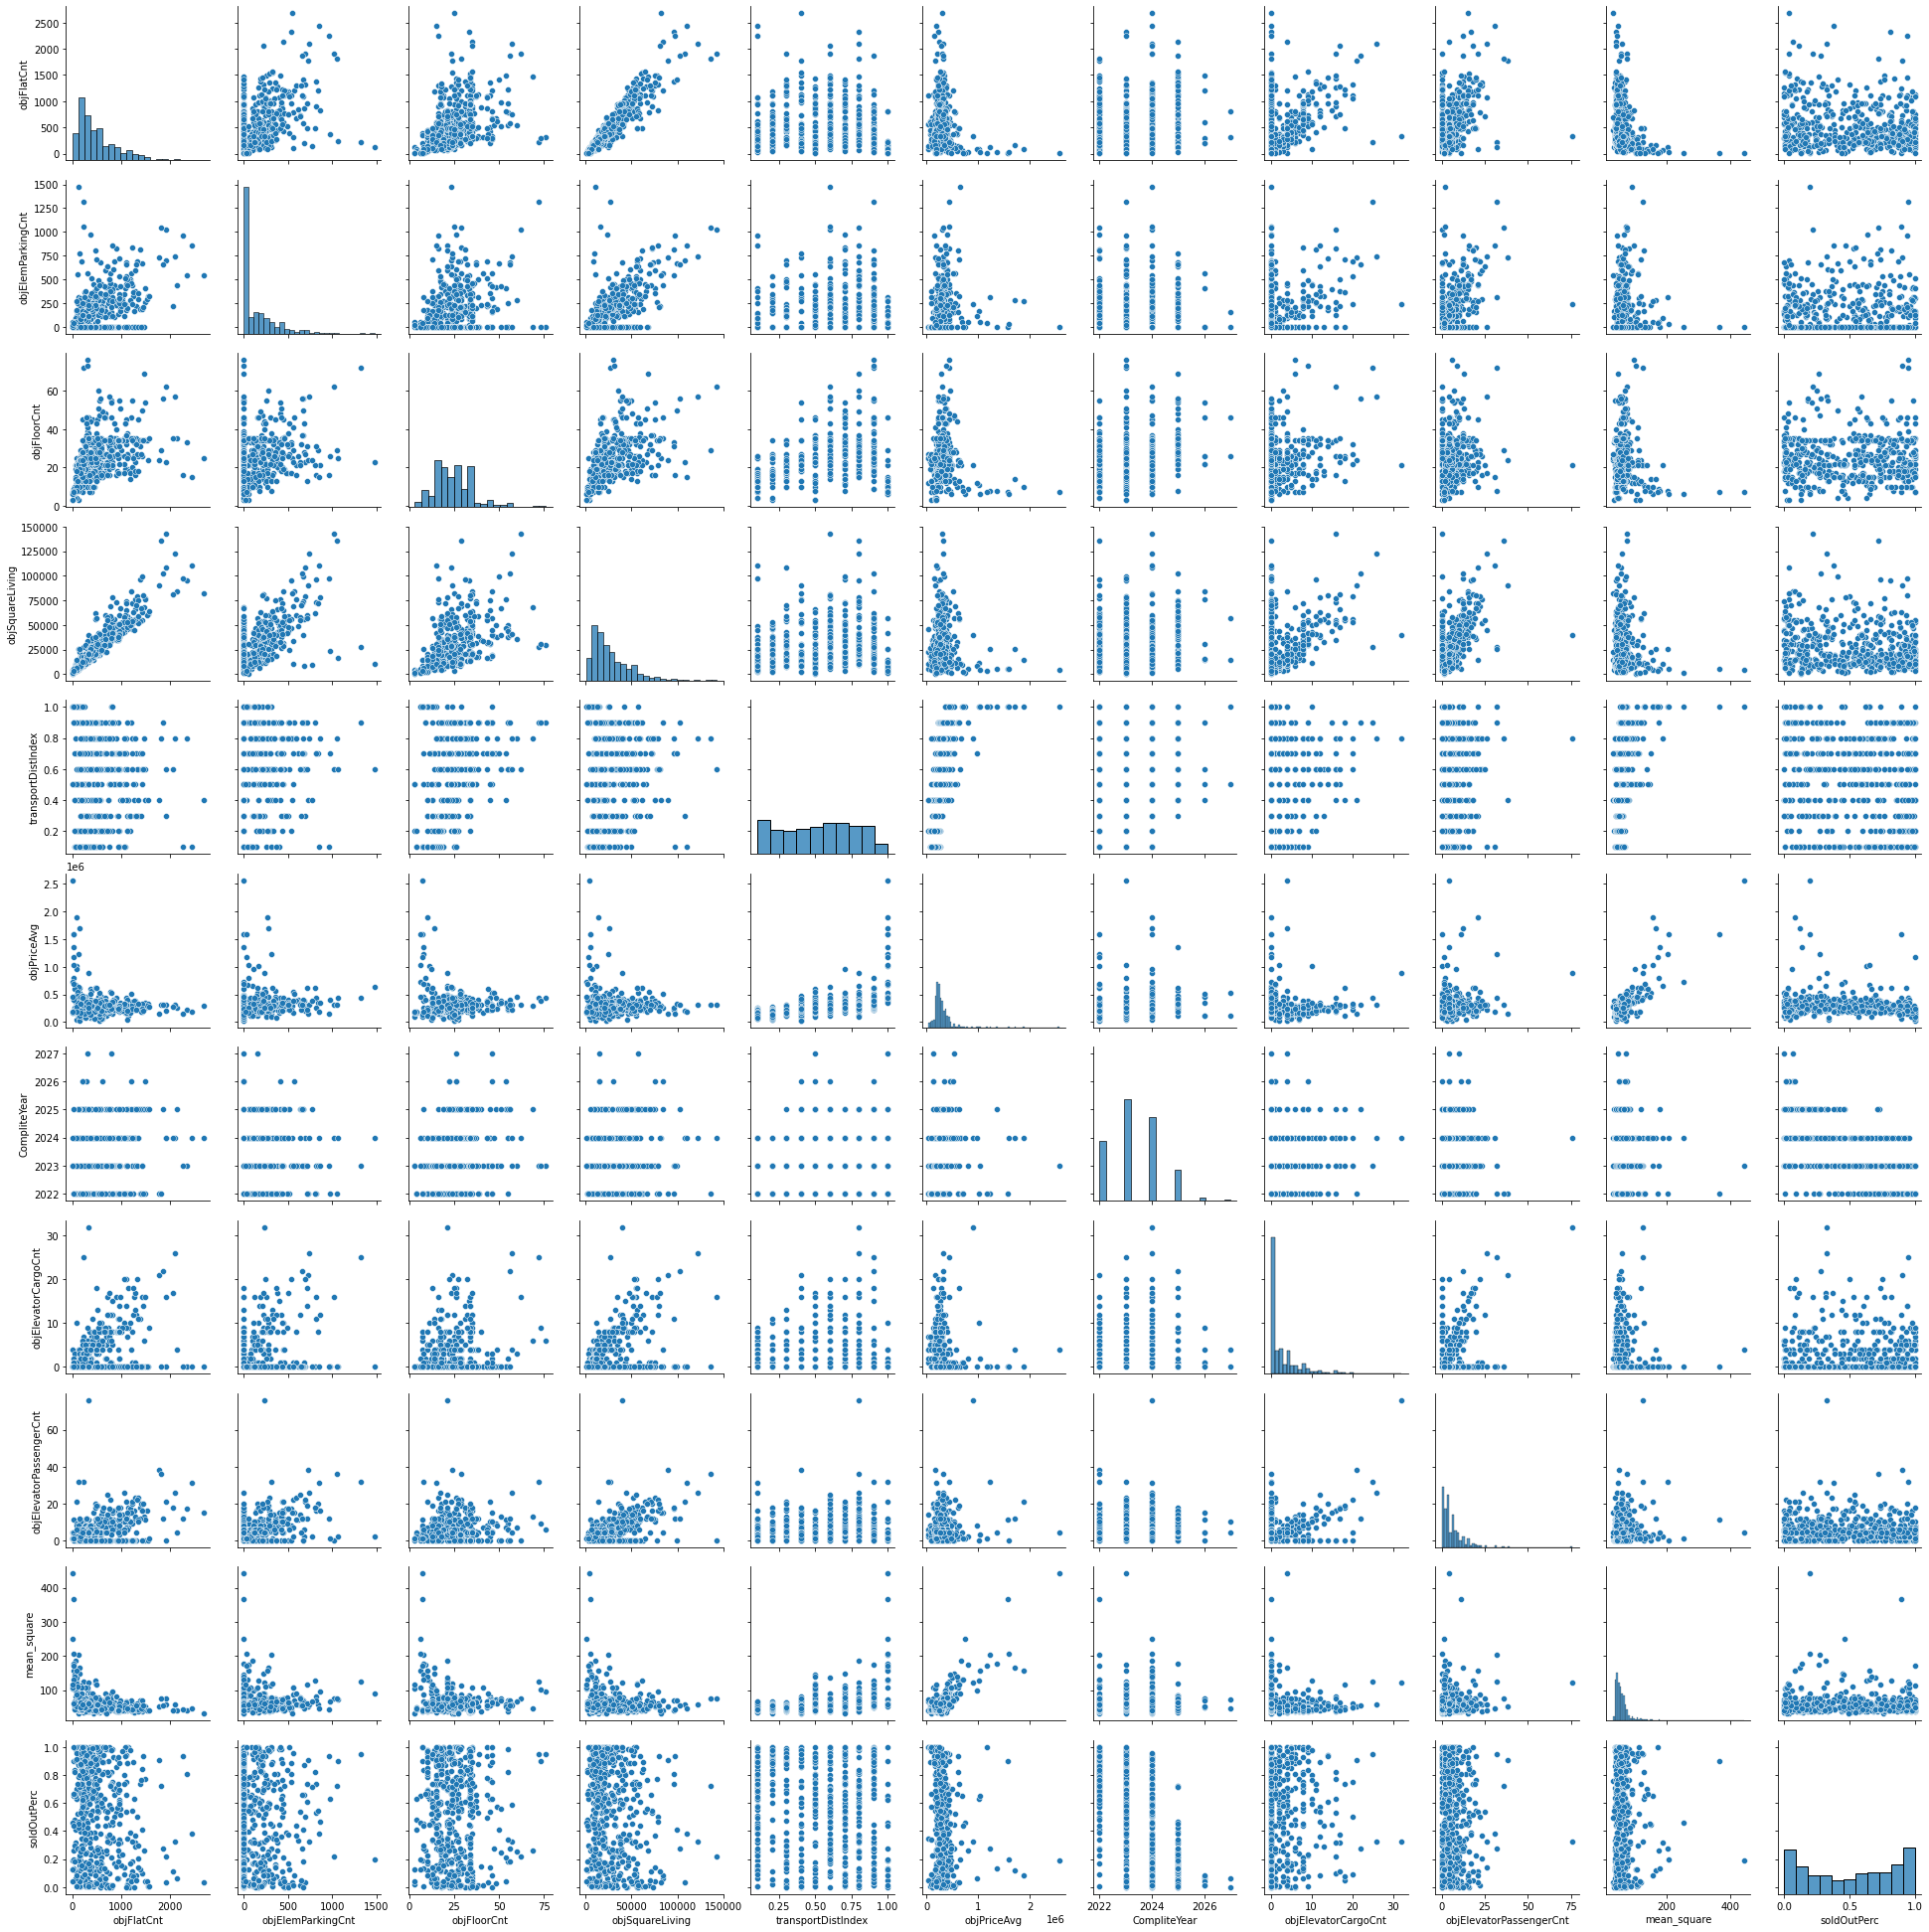

In [50]:
sns.pairplot(Moscow_data)
# Количество парковочных мест коррелирует с количеством квартир. Больше квартир - больше мест
# Самые дорогие объекты за квадрат - с наименьшим количеством квартир, но при этом с большей площадью квартиры.
# Количество грузовые лифтов также коррелирует с кол-вом пассажирских
# Зависимость средней площади квартиры от количества квартир напоминает 1/x. Самые большие квартиры там, где их меньше всего. И наоборот.
# Зависимость общей площади от средней площади квартир также обратная
# Также видно, что с высоким транспортным индексом цены на недвижимость гораздо выше

In [51]:
msk_corr = Moscow_data.corr() # Попробуем вывести корреляции
msk_corr

,objFlatCnt,objElemParkingCnt,objFloorCnt,objSquareLiving,transportDistIndex,objPriceAvg,CompliteYear,objElevatorCargoCnt,objElevatorPassengerCnt,mean_square,soldOutPerc
objFlatCnt,1.000000,0.505350,0.416980,0.924556,0.003038,-0.168338,0.142077,0.365539,0.450680,-0.274234,-0.112211
objElemParkingCnt,0.505350,1.000000,0.255061,0.657991,0.251625,0.115499,0.058505,0.238416,0.416566,0.094527,-0.072737
objFloorCnt,0.416980,0.255061,1.000000,0.469344,0.361773,-0.075835,0.243061,0.168762,0.079456,-0.149175,-0.024193
objSquareLiving,0.924556,0.657991,0.469344,1.000000,0.158104,-0.055995,0.135948,0.376139,0.541211,-0.106607,-0.112752
transportDistIndex,0.003038,0.251625,0.361773,0.158104,1.000000,0.497739,0.225326,0.027858,0.088986,0.428735,-0.102723
objPriceAvg,-0.168338,0.115499,-0.075835,-0.055995,0.497739,1.000000,0.174309,-0.049640,0.115887,0.817715,-0.184423
CompliteYear,0.142077,0.058505,0.243061,0.135948,0.225326,0.174309,1.000000,-0.021977,0.011857,0.019525,-0.633784
objElevatorCargoCnt,0.365539,0.238416,0.168762,0.376139,0.027858,-0.049640,-0.021977,1.000000,0.313434,-0.064128,0.033448
objElevatorPassengerCnt,0.450680,0.416566,0.079456,0.541211,0.088986,0.115887,0.011857,0.313434,1.000000,0.091913,-0.053696
mean_square,-0.274234,0.094527,-0.149175,-0.106607,0.428735,0.817715,0.019525,-0.064128,0.091913,1.000000,-0.059372


<AxesSubplot:>

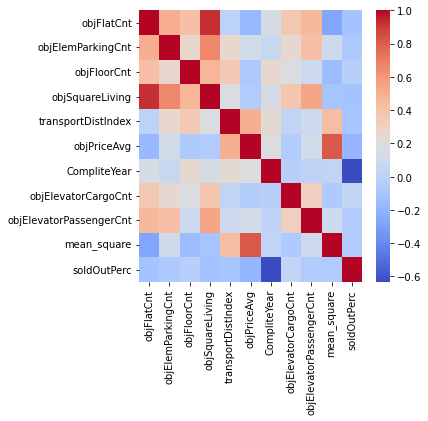

In [52]:
rcParams['figure.figsize'] = 5,5
sns.heatmap(msk_corr, cmap='coolwarm')
# На этом графике мы видим, что стоимость квартиры в большей части зависит от средней площади и транспортного индекса
# Год окончания строительства достаточно сильно влияет на процент выкупленных квартир
# Транспортный индекс также коррелирует со средней площадью квартир

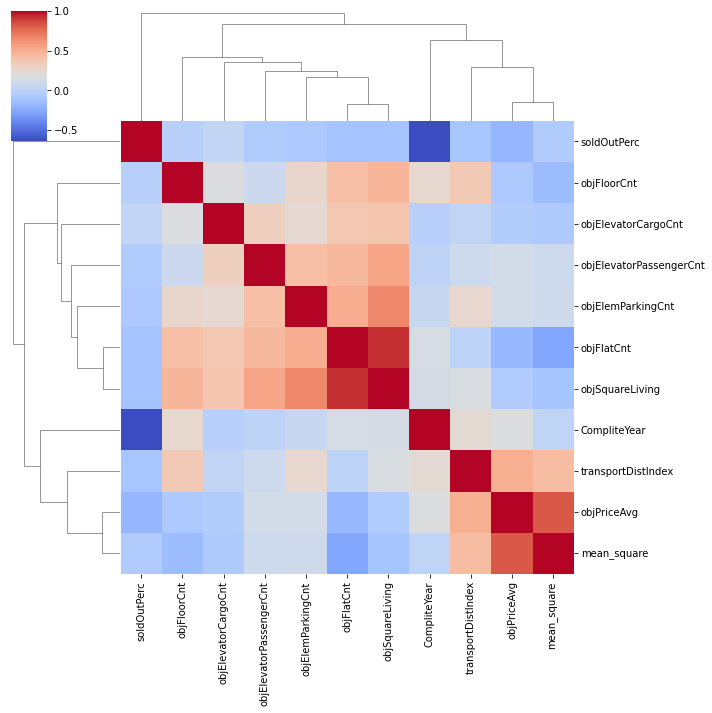

In [53]:
sns.clustermap(msk_corr, cmap='coolwarm') #попробуем немного собрать в кучу
#Также видим, что есть корреляция между количеством квартир, количеством лифтов, количеством парковочных мест и количеством этажей.
#При этом цена по большей части также зависит от средней площади.

<AxesSubplot:xlabel='objLkClassDesc', ylabel='mean_square'>

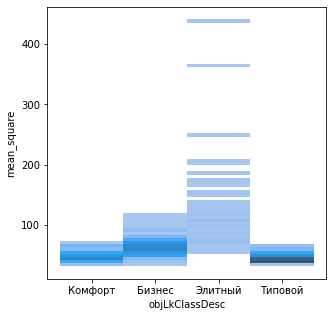

In [54]:
sns.histplot(y='mean_square', x='objLkClassDesc',data=Moscow_data)  # Выше класс - больше площадь.

<AxesSubplot:xlabel='objLkClassDesc', ylabel='objPriceAvg'>

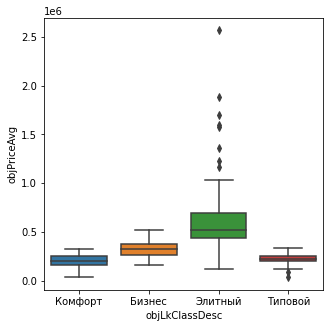

In [55]:
sns.boxplot(x="objLkClassDesc", y="objPriceAvg", data=Moscow_data)#посмотрим на соотношение цен по классам
# Элитная недвижка сильно выделяется на фоне остальных классов по стоимости. 
# Но при этом у нее самый большой разброс. 25-й процентиль даже совпадает с типовым проектом.
# Вероятнее всего, данные некорректные и необходимо будет проверять отдельные объекты.

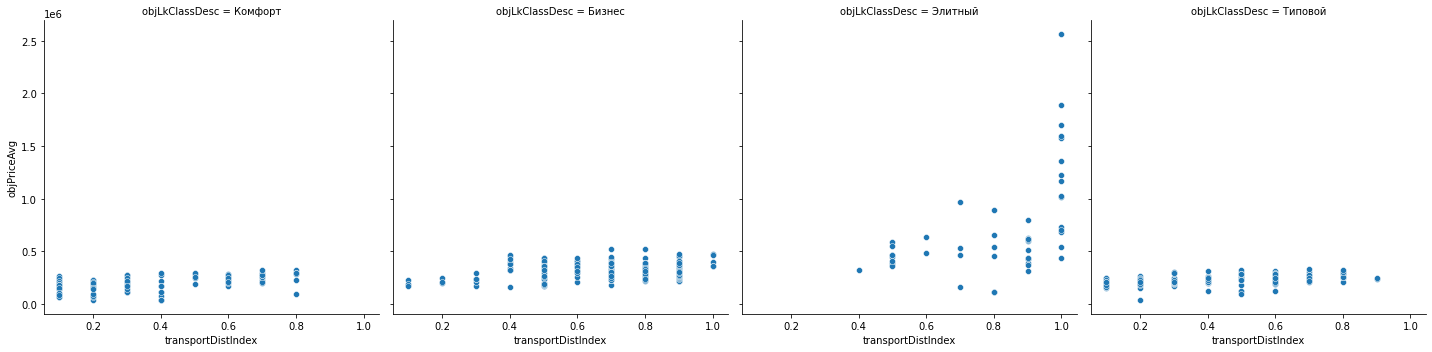

In [56]:
sns.relplot(x='transportDistIndex', y='objPriceAvg', data=Moscow_data, col='objLkClassDesc') 
# Наибольшее влияние на цены транспортная доступность оказывает в элитном сегменте

In [57]:
Moscow_data_class = Moscow_data.groupby('objLkClassDesc').mean()
Moscow_data_class.sort_values('mean_square', inplace=True)
Moscow_data_class

,objFlatCnt,objElemParkingCnt,objFloorCnt,objSquareLiving,transportDistIndex,objPriceAvg,CompliteYear,objElevatorCargoCnt,objElevatorPassengerCnt,mean_square,soldOutPerc
objLkClassDesc,,,,,,,,,,,
Типовой,543.931034,71.304598,24.097701,24498.496092,0.381132,227553.620690,2023.350575,4.212644,4.586207,45.760705,0.543526
Комфорт,628.308333,138.416667,21.758333,29653.762417,0.352174,197459.491667,2022.925000,2.475000,6.225000,48.862501,0.547858
Бизнес,502.860963,221.278075,27.385027,30715.378449,0.676796,322245.245989,2023.518717,1.983957,6.385027,63.686123,0.502904
Элитный,255.672414,215.568966,23.379310,22924.378448,0.809804,672904.586207,2023.706897,2.568966,7.982759,122.885978,0.397063


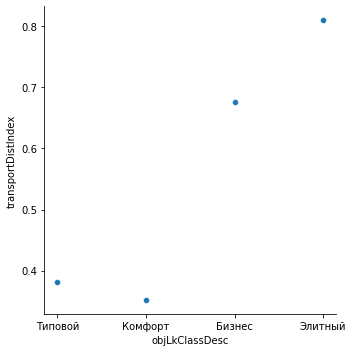

In [58]:
sns.relplot(x='objLkClassDesc', y='transportDistIndex', data=Moscow_data_class)
#в бизнес-классе и в элитном выше транспортный индекс. А вот в комфорте ниже, чем в типовом

In [59]:
Moscow_data_class_cnt = Moscow_data.groupby('objLkClassDesc').count()

In [60]:
Moscow_data_class_cnt
#Больше всего в Москве строится жилья Бизнес-класса

,objFlatCnt,objElemParkingCnt,objFloorCnt,objSquareLiving,transportDistIndex,objPriceAvg,CompliteYear,objElevatorCargoCnt,objElevatorPassengerCnt,mean_square,soldOutPerc
objLkClassDesc,,,,,,,,,,,
Бизнес,187,187,187,187,181,187,187,187,187,187,187
Комфорт,120,120,120,120,115,120,120,120,120,120,120
Типовой,174,174,174,174,159,174,174,174,174,174,174
Элитный,58,58,58,58,51,58,58,58,58,58,58


In [61]:
# На ручную проверку средних цен. 100к за квадрат в Москве это нереальные цены.
detailed_df[(detailed_df['region'] == 77) & 
            (detailed_df['objPriceAvg'] > 100000) &
           (detailed_df['soldOutPerc']<0.9)&
           (detailed_df['objElemLivingCnt'] > 0)].sort_values('objPriceAvg').head(10)

,id,pdId,region,address,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,objGuarantyEscrowFlg,objectType,residentialBuildings,newBuildingId,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objInfrstrBicycleLaneFlg,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,conclusion,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.objGuarantyEscrowFlg,developer.govFundFlg,floorMin,floorMax,miniUrl,objFloorCnt,objTransferPlanDt,objLivCeilingHeight,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objLkSaleDepEmail,developer.developerGroupName,developer.companyGroupId,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,transportDistIndex,transportDistIndexValue,nameObj,greenAreaIndexValue,airQualityIndexValue,region_name,CompliteYear,mean_square
8484,40634,460183,77,"д Рогозинино, корпус 6",138,2022-12-31,Монолит-кирпич,Без отделки,Нет,95,8309.66,77-002246,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,01-09-2022 12:06,55.5374,37.1873,0,0,Комфорт,09-09-2022 01:27,1,normal,1,121144,138,8309.66,33,0,True,0,1,1,True,1,A,2,3831,СЗ ЭДЕЛЬВЕЙС,СЗ ЭДЕЛЬВЕЙС,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЭДЕЛЬВЕЙС,0,4,0,Московская область,+7(495)781-88-22,эдельвейс.москва,4957818822@mail.ru,5030060863,1085030000384,503001001,"Московская область, город Наро-Фоминск, улица ...","Московская область, город Наро-Фоминск, улица ...",629351.0,0,50.0,Шляпин Александр Михайлович,4,Общество с ограниченной ответственностью,ООО,1,0,10.0,10.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,10.0,28-06-2023 12:00,"2,8 - 3,1",1.0,1.0,1.0,95.0,10.0,0.0,0.0,0.0,0.228045,107888.0,ООО Подъем (ИНН: 7716941989),1.0,new@edelweiss-m.ru,Центрстрой,5669.0,60.0,48.0,30.0,0.0,138.0,5.0,5.0,0.1,1.0,NaN,1.0,9.0,г. Москва,2022,60.214928
316,28167,98072,77,"д Картмазово, корпус 10",563,2023-12-31,Монолит-кирпич,Другое,Нет,0,29315.81,77-001728,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,06-09-2022 14:52,55.6121,37.3894,1,0,Комфорт,09-09-2022 01:27,0,normal,1,17624,563,29315.81,6,0,True,1,1,1,True,1,A,4,967,БИЗНЕС ГРУПП,БИЗНЕС ГРУПП,БИЗНЕС ГРУПП,0,6,4,Москва город,+7(495)409-89-04,www.ingrad.ru,link@businessgroupp.ru,7708305161,5167746372701,770701001,"город Москва, улица Краснопролетарская дом 2/4...",г Москва улица Краснопролетарская д. 2/4 стр. ...,631827.0,1,77.0,Бондарчук Алексей Сергеевич,4,Общество с ограниченной ответственностью,ООО,0,0,13.0,22.0,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,22.0,30-06-2024 12:00,"2,82 - 3,97",2.0,2.0,2.0,185.0,241.0,3.0,6.0,6.0,0.001271,116996.0,ООО ИР Девелопмент (ИНН: 7708142943),0.0,info@ingrad.com,ИНГРАД,6275.0,262.0,203.0,56.0,42.0,563.0,6.0,6.0,0.3,3.0,"Жилой комплекс ""Филатов луг"" (корпус 10)",2.0,6.0,г. Москва,2023,52.070710
318,28164,98035,77,"д Картмазово, корпус 8",301,2023-12-31,Монолит-кирпич,Другое,Нет,0,14738.29,77-001727,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,06-09-2022 14:42,55.6122,37.3888,1,0,Комфорт,09-09-2022 01:27,0,norm

In [63]:
#ИТОГО:
#Больше всего жилья строят в Москве и области, а также СПб и Краснодаре.
# Самое дорогое жилье - в Москве, СПб, на Сахалине
# Дешевое - Дагестан, Чечня, Северная Осетия
# Наибольшее количество жилья будет построено в Москве и области в 23-24 годах. 
# План постройки на 22 год в Москве сопоставим с планом постройки в Санкт-Петербурге в 23 году.
# Более многоквартирные дома строят в МСК, СПБ, Рязанской, Московской и Ленинградской областях
# При этом Москва и Санкт - Петербург на первом месте - столица и город федерального назначения
# Чем больше квартир, тем большая средняя площадь здания.
# Больше этажей - также больше площадь. Что в целом логично.
# Больше этажей - больше квартир.
# Количество парковочных мест коррелирует с количеством квартир. Больше квартир - больше мест
# Самые дорогие объекты за квадрат - с наименьшим количеством квартир, но при этом с большей площадью квартиры.
# Количество грузовые лифтов также коррелирует с кол-вом пассажирских
# Зависимость средней площади квартиры от количества квартир напоминает 1/x. Самые большие квартиры там, где их меньше всего. И наоборот.
# Зависимость общей площади от средней площади квартир также обратная.
# Также видно, что с высоким транспортным индексом цены на недвижимость гораздо выше.
# Год окончания строительства достаточно сильно влияет на процент выкупленных квартир. Чем ближе сдача - тем больше квартир куплено.
# Транспортный индекс также коррелирует со средней площадью квартир. Выше площадь - лучше расположение. 
# Выше класс жилья - выше площадь квартиры
# Больше всего в Москве строится жилья Бизнес-класса
# В бизнес-классе и в элитном выше транспортный индекс. А вот в комфорте ниже, чем в типовом, что странно.
# Данным о ценах доверять всецело нельзя. Есть сильные пересечения между различными классами жилья, при этом выборочная 
# ручная проверка показывает, что цены на жилье гораздо выше, чем на сайте НАШ ДОМ РФ.